<a href="https://colab.research.google.com/github/luasampaio/CienciaDados/blob/main/14_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
- Definição: Feature Engineering é o processo de criar, transformar e selecionar variáveis (ou features) relevantes a partir de dados brutos para melhorar o desempenho de modelos de machine learning.
-Ele é fundamental para extrair insights e informações úteis dos dados, aumentando a eficácia da modelagem.

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Montar Drive Google


In [28]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset : Titanic
- Normalizacao dos dados


```
# Isto está formatado como código
```



In [29]:
df = pd.read_csv('/content/drive/MyDrive/.Dataset/test.csv', sep=',', encoding='UTF-8', header=0)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [40]:
# Contando valores nulos
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,0


In [41]:
# Describe
df.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,208.500000,0.636364,30.272590,0.447368,0.392344,180.944976,35.627188,67.437799,1.401914
std,120.810458,0.841838,120.810458,0.481622,14.181209,0.896760,0.981429,107.533763,55.907576,19.091405,0.854496
min,892.000000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,104.250000,0.000000,21.000000,0.000000,0.000000,85.250000,7.895800,76.000000,1.000000
50%,1100.500000,3.000000,208.500000,1.000000,27.000000,0.000000,0.000000,181.000000,14.454200,76.000000,2.000000
75%,1204.750000,3.000000,312.750000,1.000000,39.000000,1.000000,0.000000,279.750000,31.500000,76.000000,2.000000
max,1309.000000,3.000000,417.000000,1.000000,76.000000,8.000000,9.000000,362.000000,512.329200,76.000000,2.000000


In [30]:
df = pd.DataFrame(df)

In [42]:
# Cardinalidade
df.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,77


In [31]:
print(df.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [32]:
# Visualizando a tabela
df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [44]:
# Valores vazios
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,0


In [45]:
# Verificando os registros com embarque vazio
df[df.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [46]:
# Atualizando o valor para as 2 linhas
df.loc[df.Embarked.isnull(),'Embarked'] = 'S'

<ipython-input-46-d744cafc6db3>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'S' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.Embarked.isnull(),'Embarked'] = 'S'


In [47]:
df.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2
5,897,3,366,1,14.0,0,0,261,9.2250,76,2


In [48]:
# Verificando valores nulos na idade
df[df.Age.isnull()].head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,187,1,NaN,0,0,195,7.8958,76,2
22,914,1,138,0,NaN,0,0,314,31.6833,76,2
29,921,3,339,1,NaN,2,0,104,21.6792,76,0


In [49]:
# Podemos verificar o describe para a idade
df.Age.describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


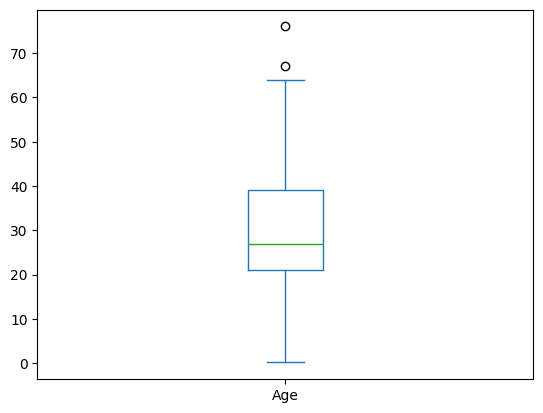

In [50]:
# E podemos visualizar isso graficamente no boxplot
df.Age.plot.box();

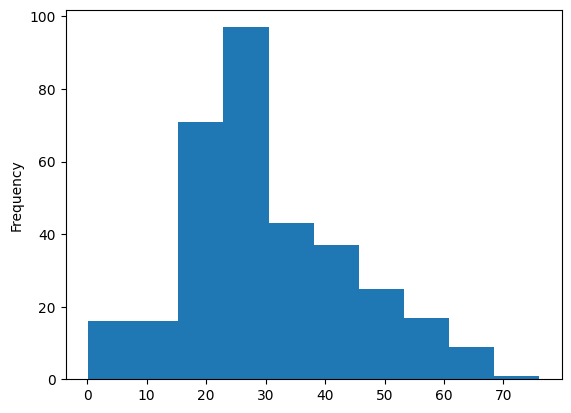

In [51]:
df.Age.plot.hist();

In [52]:
# Uma opção é usar a mediana, ou a média das idades
df.Age.median()

27.0

In [53]:
# Ou podemos, por exemplo, tirar a média de idade por alguns grupos como o Pclass
df.groupby('Pclass')['Age'].mean()

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


Iniciando A Classificacao dos dados

In [33]:
# Importando o DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()

In [36]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is of type object (string)
        df[column] = encoder.fit_transform(df[column])  # Encode the column

In [37]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized)

     PassengerId  Pclass      Name  Sex       Age  SibSp     Parch    Ticket  \
0       0.000000     1.0  0.494005  1.0  0.452723  0.000  0.000000  0.419890   
1       0.002398     1.0  0.966427  0.0  0.617566  0.125  0.000000  0.610497   
2       0.004796     0.5  0.645084  1.0  0.815377  0.000  0.000000  0.201657   
3       0.007194     1.0  0.978417  1.0  0.353818  0.000  0.000000  0.406077   
4       0.009592     1.0  0.426859  0.0  0.287881  0.125  0.111111  0.381215   
..           ...     ...       ...  ...       ...    ...       ...       ...   
413     0.990408     1.0  0.846523  1.0       NaN  0.000  0.000000  0.737569   
414     0.992806     0.0  0.678657  0.0  0.512066  0.000  0.000000  0.895028   
415     0.995204     1.0  0.796163  1.0  0.505473  0.000  0.000000  0.955801   
416     0.997602     1.0  0.920863  1.0       NaN  0.000  0.000000  0.607735   
417     1.000000     1.0  0.724221  1.0       NaN  0.125  0.111111  0.290055   

         Fare     Cabin  Embarked  
0  

In [38]:
print(df_normalized)

     PassengerId  Pclass      Name  Sex       Age  SibSp     Parch    Ticket  \
0       0.000000     1.0  0.494005  1.0  0.452723  0.000  0.000000  0.419890   
1       0.002398     1.0  0.966427  0.0  0.617566  0.125  0.000000  0.610497   
2       0.004796     0.5  0.645084  1.0  0.815377  0.000  0.000000  0.201657   
3       0.007194     1.0  0.978417  1.0  0.353818  0.000  0.000000  0.406077   
4       0.009592     1.0  0.426859  0.0  0.287881  0.125  0.111111  0.381215   
..           ...     ...       ...  ...       ...    ...       ...       ...   
413     0.990408     1.0  0.846523  1.0       NaN  0.000  0.000000  0.737569   
414     0.992806     0.0  0.678657  0.0  0.512066  0.000  0.000000  0.895028   
415     0.995204     1.0  0.796163  1.0  0.505473  0.000  0.000000  0.955801   
416     0.997602     1.0  0.920863  1.0       NaN  0.000  0.000000  0.607735   
417     1.000000     1.0  0.724221  1.0       NaN  0.125  0.111111  0.290055   

         Fare     Cabin  Embarked  
0  

# Verificando o tipo de dados

In [39]:
print(df_normalized
    .dtypes)

PassengerId    float64
Pclass         float64
Name           float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object
